# October DM Analysis

### Goal Objective:
2 drops of DM necessary
result of every drop

In [1]:
import numpy as np  # NumPy: For numerical and array operations.
import pandas as pd  # Pandas: For data manipulation and analysis.
import matplotlib.pyplot as plt  # Matplotlib: For creating various types of plots and charts.
import seaborn as sns  # Seaborn: For making data visualizations more attractive and informative.

## for tables
from tabulate import tabulate
from IPython.display import display, HTML

In [2]:
df = pd.read_csv("data/clean_data.csv")

In [3]:
drop_sum_table = df.groupby('drop').agg(people_who_scanned=pd.NamedAgg(column='drop', aggfunc='size')).reset_index()
print(drop_sum_table)

    drop  people_who_scanned
0  drop1                  55
1  drop2                  24


In [4]:
# Drop 1:
# US:33,301
# Canada: 6,494
# Drop2(half from drop 1):
# US:16,651
# Canada: 3,245

drop1_volumn = 33301+6494
drop2_volumn = 11651+3245
drop_drop2 = df.copy()

drop_sum_table2 = drop_drop2.groupby('drop').agg(people_who_scanned=pd.NamedAgg(column='drop', aggfunc='size')).reset_index()

drop_sum_table2['sent_volume'] = [drop1_volumn,drop2_volumn]

# Filter the DataFrame for rows where 'submit_form' is True
filtered_df = drop_drop2[drop_drop2['submit_form'] == True]
# Create the summary table by grouping and aggregating
drop_sum_table333 = filtered_df.groupby('drop').agg(
    people_who_scanned=pd.NamedAgg(column='drop', aggfunc='size')
).reset_index()
# Rename the aggregated column for clarity
drop_sum_table333.rename(columns={'people_who_scanned': 'submit_form'}, inplace=True)

# Filter the DataFrame for rows where 'submit_form' is True
filtered_df2 = drop_drop2[drop_drop2['inbound_call'] == True].copy()
# Create the summary table by grouping and aggregating
drop_sum_table4444 = filtered_df2.groupby('drop').agg(
    people_who_scanned=pd.NamedAgg(column='drop', aggfunc='size')
).reset_index()
# Rename the aggregated column for clarity
drop_sum_table4444.rename(columns={'people_who_scanned': 'inbound_call'}, inplace=True)



## join the table
merged_df = drop_sum_table2.merge(drop_sum_table333, on='drop', how='left')
merged_df2 = merged_df.merge(drop_sum_table4444, on='drop', how='left')

# change column order
new_column_order = ['drop','people_who_scanned', 'submit_form', 'sent_volume', 'inbound_call']
merged_df333 = merged_df2[new_column_order].copy()


# Calculate the total row
total_row = pd.DataFrame({
    'drop': ['Total'],
    'people_who_scanned': [merged_df333['people_who_scanned'].sum()],
    'submit_form': [merged_df333['submit_form'].sum()],
    'sent_volume': [merged_df333['sent_volume'].sum()],
    'inbound_call': [merged_df333['inbound_call'].sum()]
})

merged_df333 = pd.concat([merged_df333, total_row], ignore_index=True)

merged_df333['ResponseRate'] = ((merged_df333['people_who_scanned'] / merged_df333['sent_volume']) * 100).round(2).astype(str) + '%'
merged_df333 = merged_df333.fillna(0)

merged_df333.to_csv("data/summary_table.csv")
tabulated_data_merged = tabulate(merged_df333, headers='keys', tablefmt='html')
display(HTML(tabulated_data_merged))

,drop,people_who_scanned,submit_form,sent_volume,inbound_call,ResponseRate
0,drop1,55,8,39795,2,0.14%
1,drop2,24,0,14896,0,0.16%
2,Total,79,8,54691,2,0.14%


In [5]:
tabulated_data_merged22 = tabulate(merged_df333, headers='keys', tablefmt='pretty')
print(tabulated_data_merged22)

+---+-------+--------------------+-------------+-------------+--------------+--------------+
|   | drop  | people_who_scanned | submit_form | sent_volume | inbound_call | ResponseRate |
+---+-------+--------------------+-------------+-------------+--------------+--------------+
| 0 | drop1 |         55         |     8.0     |    39795    |     2.0      |    0.14%     |
| 1 | drop2 |         24         |     0.0     |    14896    |     0.0      |    0.16%     |
| 2 | Total |         79         |     8.0     |    54691    |     2.0      |    0.14%     |
+---+-------+--------------------+-------------+-------------+--------------+--------------+


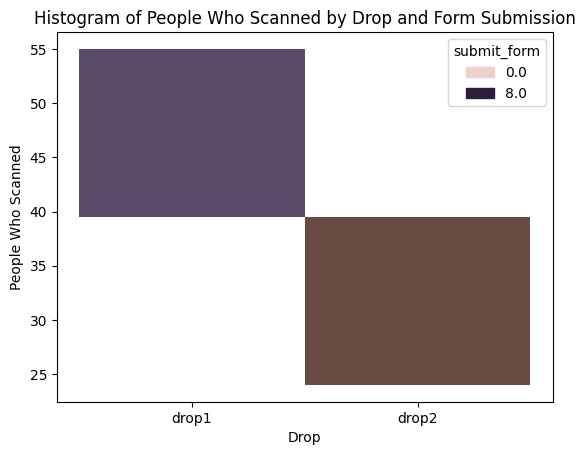

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data in the 'merged_df333' DataFrame
data = merged_df333[merged_df333['drop']!='Total']

# Create a histogram
sns.histplot(data=data, x="drop", y="people_who_scanned", hue="submit_form", element="step", common_norm=False)

# Set labels and title
plt.xlabel("Drop")
plt.ylabel("People Who Scanned")
plt.title("Histogram of People Who Scanned by Drop and Form Submission")

# Show the plot
plt.show()


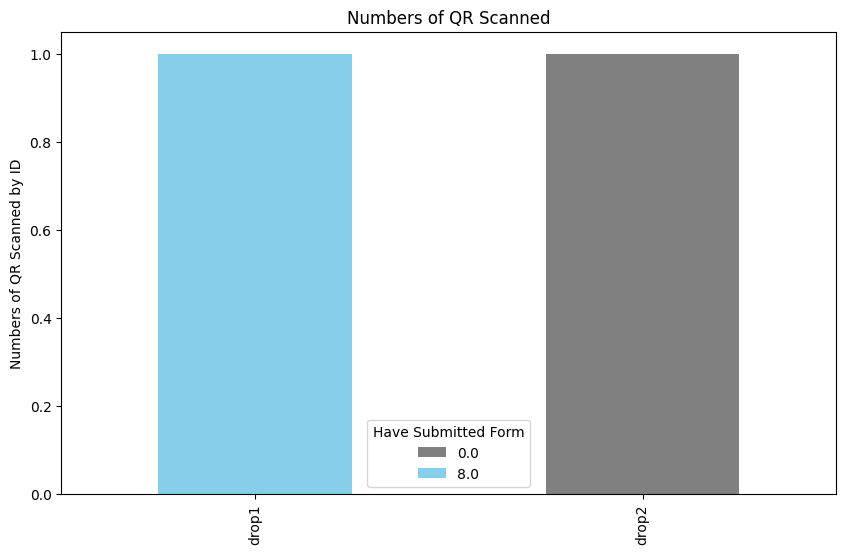

In [7]:
import matplotlib.pyplot as plt

grouped_data = data.groupby(['drop', 'submit_form']).size().unstack(fill_value=0)

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True, color=['grey', 'skyblue'], figsize=(10, 6))

plt.title('Numbers of QR Scanned')
plt.xlabel('')
plt.ylabel('Numbers of QR Scanned by ID')
plt.legend(title='Have Submitted Form')

plt.savefig('grouped_bar_chart.png')
plt.show()


In [8]:
call = pd.read_csv("data/october_dm_called")

call_sum = call.groupby('Period').agg(
    counts=pd.NamedAgg(column='Period', aggfunc='size')
).reset_index()

print(call_sum)
call_sum.to_csv("data/call_summary.csv")

  Period  counts
0  drop1       8
1  drop2      23
